In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dir_name=path=r'Cornimage'
sample=tf.keras.preprocessing.image_dataset_from_directory(dir_name,seed=123,image_size=(180,180),batch_size=32)


In [ ]:
plt.figure(figsize=(10,10))
for image,label in sample.take(9):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(class_names[label[i]])
        

In [4]:
image_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2, # random application of shearing
    zoom_range = 0.2,
    horizontal_flip = True,
     validation_split=0.25
)

In [5]:
path=r'Cornimage'
train_dataset = image_generator.flow_from_directory(
                                                    batch_size=32,
                                                     directory=path,
                                                     shuffle=True,
                                                     color_mode = 'rgb',
                                                     target_size=(128, 128), 
                                                     subset="training",
                                                     class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(
                                                    batch_size=32,
                                                    directory=path,
                                                    shuffle=True,
                                                    color_mode = 'rgb',
                                                    target_size=(128, 128), 
                                                    subset="validation",
                                                    class_mode='categorical')

Found 2881 images belonging to 4 classes.
Found 958 images belonging to 4 classes.


In [6]:
model1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(128,4),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4,activation='softmax')
    
    ])


model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
model2=tf.keras.Sequential([
    tf.keras.layers.Conv2D(128,4),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4,activation='softmax')
    
    ])
model2.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
model3=tf.keras.Sequential([
    tf.keras.layers.Conv2D(128,4),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4,activation='softmax')
    
    ])
model3.compile(optimizer='RMSprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
history1=model1.fit_generator(
    train_dataset,
    steps_per_epoch = train_dataset.samples // 32,
    validation_data = validation_dataset, 
    validation_steps = validation_dataset.samples // 32,
    epochs = 5)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
90/90 [==============================] - 47s 521ms/step - loss: 2.1755 - accuracy: 0.5862 - val_loss: 0.7955 - val_accuracy: 0.6530
Epoch 2/5
90/90 [==============================] - 47s 519ms/step - loss: 0.8635 - accuracy: 0.6399 - val_loss: 0.5533 - val_accuracy: 0.7812
Epoch 3/5
90/90 [==============================] - 47s 519ms/step - loss: 0.6985 - accuracy: 0.7318 - val_loss: 0.4673 - val_accuracy: 0.8481
Epoch 4/5
90/90 [==============================] - 47s 520ms/step - loss: 0.6596 - accuracy: 0.7483 - val_loss: 0.3608 - val_accuracy: 0.8394
Epoch 5/5
90/90 [==============================] - 47s 520ms/step - loss: 0.5691 - accuracy: 0.7873 - val_loss: 0.4438 - val_accuracy: 0.8157


In [10]:
history2=model2.fit_generator(
    train_dataset,
    steps_per_epoch = train_dataset.samples // 32,
    validation_data = validation_dataset, 
    validation_steps = validation_dataset.samples // 32,
    epochs = 5)

Epoch 1/5
90/90 [==============================] - 43s 476ms/step - loss: 1.1142 - accuracy: 0.5258 - val_loss: 0.7671 - val_accuracy: 0.6045
Epoch 2/5
90/90 [==============================] - 42s 472ms/step - loss: 0.7955 - accuracy: 0.6676 - val_loss: 0.7768 - val_accuracy: 0.6261
Epoch 3/5
90/90 [==============================] - 42s 470ms/step - loss: 0.6944 - accuracy: 0.7031 - val_loss: 0.5397 - val_accuracy: 0.8147
Epoch 4/5
90/90 [==============================] - 42s 471ms/step - loss: 0.6037 - accuracy: 0.7652 - val_loss: 1.3672 - val_accuracy: 0.4935
Epoch 5/5
90/90 [==============================] - 42s 472ms/step - loss: 0.5587 - accuracy: 0.7750 - val_loss: 0.3547 - val_accuracy: 0.8427


In [11]:
history3=model3.fit_generator(
    train_dataset,
    steps_per_epoch = train_dataset.samples // 32,
    validation_data = validation_dataset, 
    validation_steps = validation_dataset.samples // 32,
    epochs = 5)

Epoch 1/5
90/90 [==============================] - 59s 659ms/step - loss: 9.1698 - accuracy: 0.4223 - val_loss: 4.3021 - val_accuracy: 0.5151
Epoch 2/5
90/90 [==============================] - 59s 659ms/step - loss: 1.6861 - accuracy: 0.4472 - val_loss: 1.6636 - val_accuracy: 0.4946
Epoch 3/5
90/90 [==============================] - 59s 656ms/step - loss: 1.4961 - accuracy: 0.4559 - val_loss: 1.0265 - val_accuracy: 0.5690
Epoch 4/5
90/90 [==============================] - 59s 656ms/step - loss: 1.5958 - accuracy: 0.5188 - val_loss: 0.9629 - val_accuracy: 0.5981
Epoch 5/5
90/90 [==============================] - 59s 657ms/step - loss: 1.5984 - accuracy: 0.5356 - val_loss: 1.4592 - val_accuracy: 0.5420


In [12]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  6272      
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  31490112  
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  260       
Total params: 31,496,644
Trainable params: 31,496,644
Non-trainable params: 0
____________________________________________

In [13]:
model_hist1=history1.history
model_hist1=pd.DataFrame(model_hist1)
model_hist1['epoch']=history1.epoch
model_hist1.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,2.175483,0.586171,0.795468,0.653017,0
1,0.863498,0.639874,0.553324,0.781250,1
2,0.698481,0.731836,0.467335,0.848060,2
3,0.659551,0.748333,0.360825,0.839440,3
4,0.569061,0.787294,0.443796,0.815733,4


In [14]:
model_hist2=history2.history
model_hist2=pd.DataFrame(model_hist2)
model_hist2['epoch']=history2.epoch
model_hist2.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,1.114221,0.525798,0.767068,0.604526,0
1,0.795543,0.667603,0.776841,0.626078,1
2,0.694368,0.703054,0.539714,0.814655,2
3,0.603693,0.765181,1.367238,0.493534,3
4,0.558664,0.775009,0.354693,0.842672,4


In [15]:
model_hist3=history3.history
model_hist3=pd.DataFrame(model_hist3)
model_hist3['epoch']=history3.epoch
model_hist3.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,9.169787,0.422253,4.302098,0.515086,0
1,1.686112,0.447174,1.663634,0.494612,1
2,1.496141,0.455949,1.026544,0.568965,2
3,1.595802,0.518779,0.962885,0.598060,3
4,1.598356,0.535627,1.459223,0.542026,4


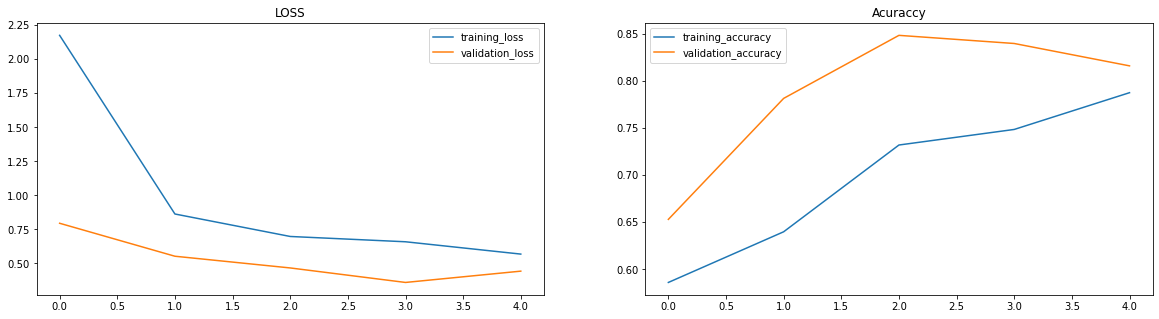

In [16]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(model_hist1['epoch'],model_hist1['loss'],label='training_loss')
plt.subplot(1,2,1)
plt.plot(model_hist1['epoch'],model_hist1['val_loss'],label='validation_loss')
plt.legend()
plt.title('LOSS')
plt.subplot(1,2,2)
plt.plot(model_hist1['epoch'],model_hist1['accuracy'],label='training_accuracy')
plt.subplot(1,2,2)
plt.plot(model_hist1['epoch'],model_hist1['val_accuracy'],label='validation_accuracy')
plt.legend()
plt.title('Acuraccy')
plt.show()


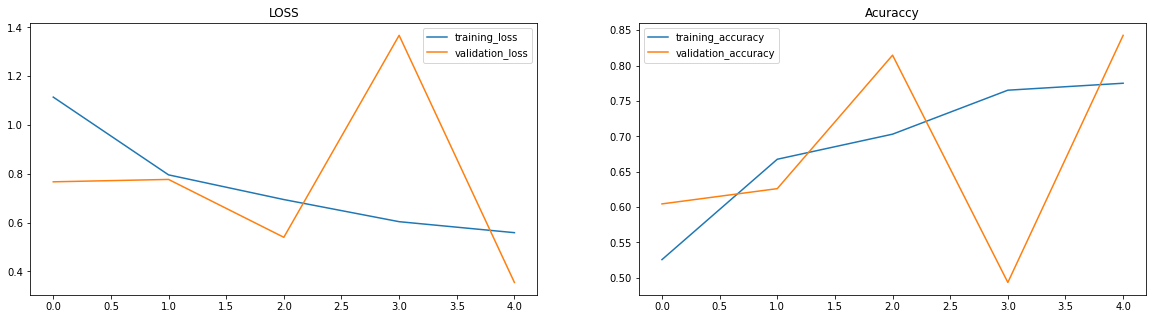

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(model_hist2['epoch'],model_hist2['loss'],label='training_loss')
plt.subplot(1,2,1)
plt.plot(model_hist2['epoch'],model_hist2['val_loss'],label='validation_loss')
plt.legend()
plt.title('LOSS')
plt.subplot(1,2,2)
plt.plot(model_hist2['epoch'],model_hist2['accuracy'],label='training_accuracy')
plt.subplot(1,2,2)
plt.plot(model_hist2['epoch'],model_hist2['val_accuracy'],label='validation_accuracy')
plt.legend()
plt.title('Acuraccy')
plt.show()

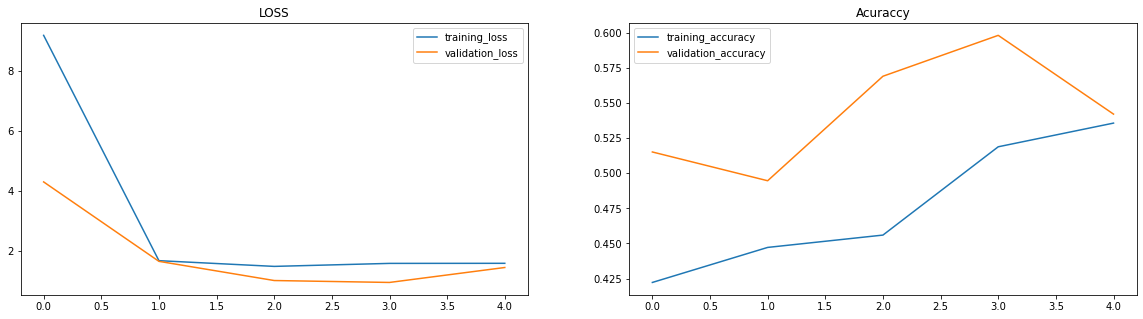

In [18]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(model_hist3['epoch'],model_hist3['loss'],label='training_loss')
plt.subplot(1,2,1)
plt.plot(model_hist3['epoch'],model_hist3['val_loss'],label='validation_loss')
plt.legend()
plt.title('LOSS')
plt.subplot(1,2,2)
plt.plot(model_hist3['epoch'],model_hist3['accuracy'],label='training_accuracy')
plt.subplot(1,2,2)
plt.plot(model_hist3['epoch'],model_hist3['val_accuracy'],label='validation_accuracy')
plt.legend()
plt.title('Acuraccy')
plt.show()